In [25]:
from stockanalyzer import fetch_stock_data, calculate_moving_average, calculate_rsi, calculate_bollinger_bands, calculate_macd, plot_stock_data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta




In [26]:
def fetch_dynamic_stock_data(ticker, start_date):
    """
    Fetches stock data dynamically based on a start date up to the current date.
    
    Parameters:
        ticker (str): The stock symbol for which data is to be fetched.
        start_date (datetime): The starting date from which to fetch data.
    
    Returns:
        DataFrame: Stock data from the start date to today's date.
    """
    end_date = datetime.today()
    return fetch_stock_data(ticker, start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d'))

# User input for stock ticker symbol
ticker = input("Enter the ticker symbol of the stock you want to analyze (e.g., AAPL): ")

# User input for selecting date range for data analysis
date_option = input("Choose the date range: 6 Months, YTD, or Full: ").lower()


[*********************100%%**********************]  1 of 1 completed


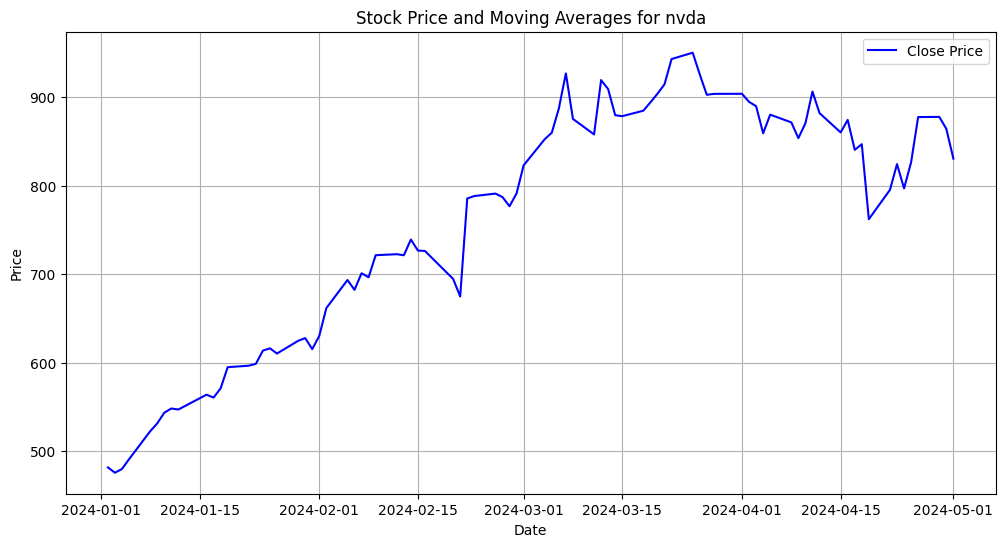

In [27]:
# Determining the start date based on user input
if date_option == "6 months":
    start_date = datetime.today() - timedelta(days=180)
elif date_option == "ytd":
    start_date = datetime(datetime.today().year, 1, 1)
else:  # Default to full data starting from a placeholder date
    start_date = datetime(2017, 1, 1)  # Placeholder for actual listing date

# Fetching the stock data
data = fetch_dynamic_stock_data(ticker, start_date)
# Additional plotting features, if any
plot_stock_data(data, ticker)  # Use only if it does not interfere with the current plot


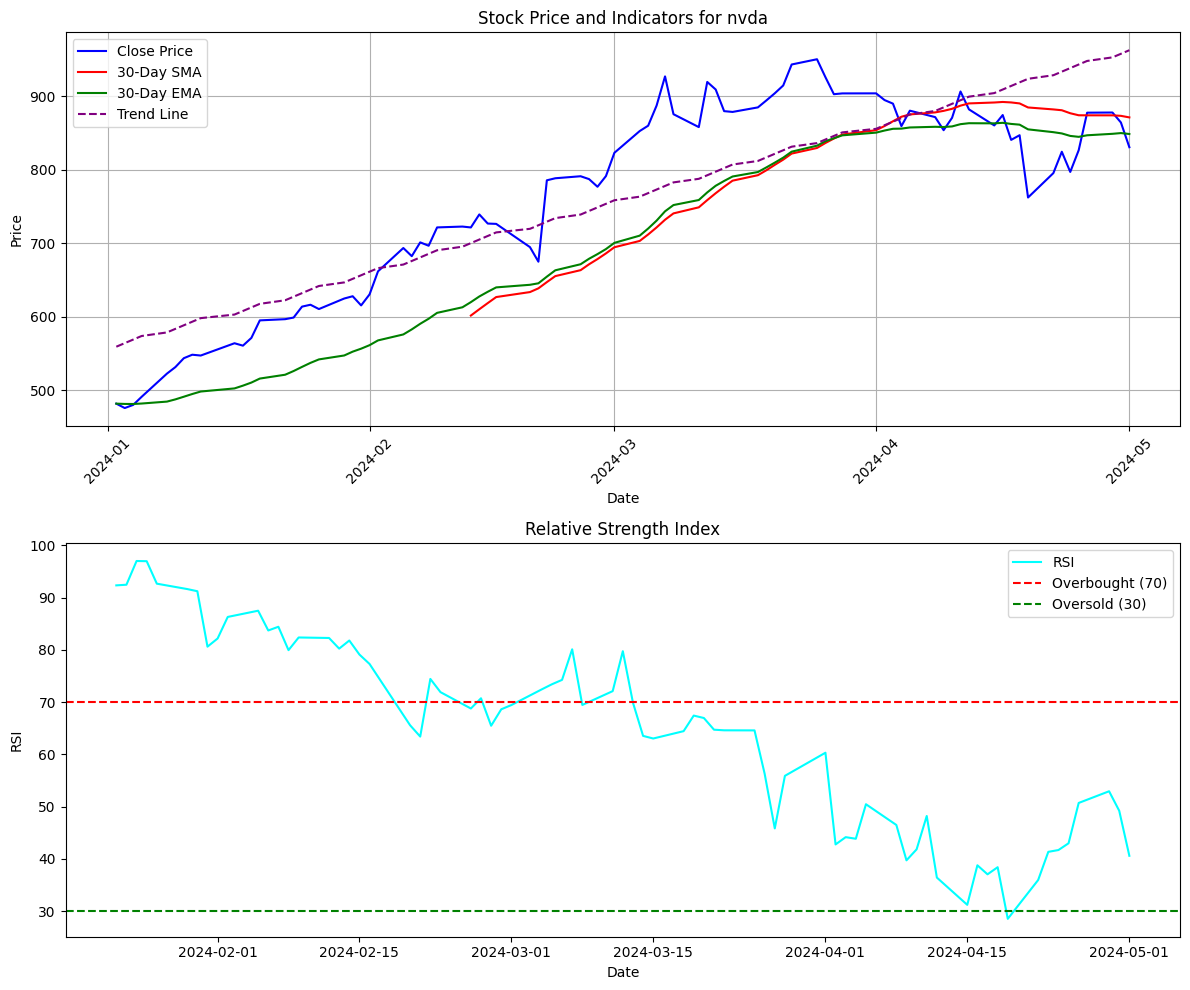

In [28]:

if data is not None:
    # Calculate the 30-day Simple and Exponential Moving Averages
    simple_ma = calculate_moving_average(data, 30, 'simple')
    exponential_ma = calculate_moving_average(data, 30, 'exponential')

    # Calculate Relative Strength Index (RSI)
    rsi = calculate_rsi(data)

    # Calculate Bollinger Bands
    upper_band, middle_band, lower_band = calculate_bollinger_bands(data)

    # Calculate Moving Average Convergence Divergence (MACD)
    macd, signal = calculate_macd(data)

    # Linear regression for trend analysis
    indices = np.arange(len(data.index))
    slope, intercept = np.polyfit(indices, data['Close'], 1)
    trend_line = intercept + slope * indices

    # Plotting setup
    plt.figure(figsize=(12, 10))

    # Subplot for stock prices and indicators
    plt.subplot(2, 1, 1)
    plt.plot(data.index, data['Close'], label='Close Price', color='blue')
    plt.plot(data.index, simple_ma, label='30-Day SMA', color='red')
    plt.plot(data.index, exponential_ma, label='30-Day EMA', color='green')
    plt.plot(data.index, trend_line, label='Trend Line', color='purple', linestyle='--')
    plt.title(f'Stock Price and Indicators for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)

    # Subplot for RSI
    plt.subplot(2, 1, 2)
    plt.plot(data.index, rsi, label='RSI', color='cyan')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    plt.title('Relative Strength Index')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()



    plt.tight_layout()
    plt.show()
else:
    print(f"No data available for the ticker {ticker}. Please check the ticker symbol and try again.")
